## Comparing different ML models in the Detection of Cyber-attacks in Industrial Control Systems.

This project will involve building and evaluating machine learning (ML) models for detecting power system disturbances in Industrial Control Systems. The datasets used are based on measurements related to normal, disturbance, control, cyber-attack behaviors for a power system. The steps that will be followed:
1. Data preprocessing
2. Feature engineering
3. Feature selection
4. Building ML models
5. Evaluate ML models

> **Note:** the parts of this notebook that perform model building and evaluation take a significant amount of processing time. In addition, the warnings have not been silenced/ignored because I provide some insights on them throughout the notebook and in a separate report.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.decomposition import PCA

### 1. Data preparation

> Data preparation involved downloaded the data and loading it in the notebook

In [2]:
#Loading the data csv files into data frames
for i in range(1,16):
    file_name = "data"+ str(i)
    df_name = f"data_{i}"
    locals()[df_name]= pd.read_csv(f"./triple/{file_name}.csv")

### 2. Exploratory Data Analysis

> In this section, we'll analyze the data, its characteristics, identify underlying patterns in the data, and possible associations between the variables.

In [3]:
#initial exploration of the data
datasets = [data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12,data_13,data_14,data_15]

for i in range(15):
    print(f"Dataset {i}")
    print(datasets[i].info())

Dataset 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4966 entries, 0 to 4965
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(112), int64(16), object(1)
memory usage: 4.9+ MB
None
Dataset 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5069 entries, 0 to 5068
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(112), int64(16), object(1)
memory usage: 5.0+ MB
None
Dataset 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5415 entries, 0 to 5414
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(112), int64(16), object(1)
memory usage: 5.3+ MB
None
Dataset 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5202 entries, 0 to 5201
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(113), int64(15), object(1)
memory usage: 5.1+ MB
None
Dataset 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5161 entries, 0 to 5160
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(112), int64(16), object(1)
memory usage: 5.1+ MB
None
Dataset 5
<class 'pa

In [4]:
#combining the datasets into one
combined_df = pd.concat(datasets, ignore_index=True)
combined_df

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,NoEvents
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,NoEvents
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,NoEvents
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,NoEvents
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,141.589330,131885.4002,21.606238,131860.3269,-98.382583,131960.6200,143.348311,309.45590,22.156278,315.13231,...,0,0,0,0,0,0,0,0,0,Natural
78373,141.526305,131960.6200,21.566131,131910.4735,-98.439879,132010.7666,143.010266,310.37145,21.915636,315.49853,...,0,0,0,0,0,0,0,0,0,Natural
78374,141.365877,132035.8398,21.394244,131985.6933,-98.611766,132085.9864,141.950294,313.30121,21.245275,317.14652,...,0,0,0,0,0,0,0,0,0,Natural
78375,141.348688,132035.8398,21.371326,131985.6933,-98.617496,132111.0596,141.829973,313.11810,21.193709,317.51274,...,0,0,0,0,0,0,0,0,0,Natural


In [5]:
#resulting dataframe
combined_df.shape

(78377, 129)

In [6]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78377 entries, 0 to 78376
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(113), int64(15), object(1)
memory usage: 77.1+ MB


In [7]:
#checking for missing values
combined_df.isna().values.sum()

0

In [8]:
#classes in the data
combined_df['marker'].value_counts()

Attack      55663
Natural     18309
NoEvents     4405
Name: marker, dtype: int64

#### Visualizing classes in the data

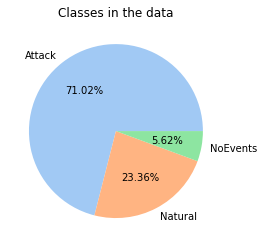

In [16]:
#using a pie chart
colors = sns.color_palette('pastel')[0:3]
plt.title("Classes in the data")
plt.pie(combined_df.marker.value_counts(), labels=['Attack','Natural','NoEvents'], colors=colors, autopct='%.2f%%')
plt.show()

> From the above bar graph, we can observe an imbalance in the data. With 71% of records classified as attacks, around 23% classified as Natural, and less than 6% classified as NoEvents.

#### Summary statistics

> For visibility a statistics summary table will be displayed for every 20 columns

In [17]:
#summary statistics
combined_df.iloc[:,:19].describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH
count,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000
mean,-15.802424,130764.039577,2.175196,131035.528095,6.834315,131395.717581,-14.334996,393.949321,3.538540,387.438133,6.129781,381.912845,-15.798835,131056.980030,0.207857,297.083556,0.227606,87.397031,-14.504282
std,100.876750,8546.118477,111.743169,5393.135370,97.065063,5443.752388,99.601107,190.966011,109.504977,151.277183,95.294904,153.326452,100.877118,6152.379663,13.075863,2687.617199,12.488596,897.541412,99.605025
min,-179.988962,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.501948,0.000000,-179.903018,0.000000,-179.994691
25%,-100.416583,131057.982300,-102.129727,130732.029800,-69.459673,131133.202100,-98.159129,305.793700,-94.790138,311.836330,-66.279758,303.962600,-100.399394,130982.762500,0.000000,0.000000,0.000000,0.000000,-98.227884
50%,-28.865614,131684.814000,8.118812,131358.861500,13.401483,131760.033900,-23.514188,378.671480,1.885031,383.249230,6.881223,376.474160,-28.842695,131609.594200,0.000000,0.000000,0.000000,0.000000,-23.749101
75%,68.096034,132186.279400,104.897113,131885.400200,85.324875,132261.499300,66.274028,456.676340,102.674037,460.338540,82.053286,454.295910,68.096034,132085.986400,0.000000,0.000000,0.000000,0.000000,66.027656
max,179.994691,151592.990400,179.994691,151567.917200,179.988962,151693.283500,179.994691,1779.462980,179.994691,1265.656320,179.994691,1263.459000,179.988962,151618.063700,179.977503,46987.307980,179.467570,17501.142460,179.988962


In [18]:
combined_df.iloc[:,20:40].describe()

,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH
count,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,7.837700e+04,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000
mean,-1.734936,9.979982,6.123374,9.494176,59.992801,0.000529,inf,0.018428,788.868750,-15.216491,127033.389923,4.751134,128015.428015,5.510410,128362.246185,15.836436,395.109497,-6.961603,392.508845,-6.437082
std,68.383257,47.241783,73.059209,47.875569,0.610045,0.087799,NaN,0.242813,14048.448459,101.837622,16155.767175,111.043204,12106.876201,96.270117,11990.863815,99.876094,171.765698,94.996062,152.357765,108.896267
min,-179.994691,0.000000,-179.988962,0.000000,0.000000,-4.010000,1.852102e-01,-3.140569,0.000000,-179.994691,0.000000,-179.997259,0.000000,-179.994691,0.000000,-179.997259,0.000000,-179.994691,0.000000,-179.994691
25%,0.000000,0.000000,0.000000,0.000000,59.999000,0.000000,8.291006e+00,-0.028589,0.000000,-101.562499,128826.461300,-96.490178,128769.000000,-69.052873,128901.681100,-65.091252,310.554560,-83.182013,316.446289,-105.295719
50%,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,1.011317e+01,0.016968,0.000000,-29.665834,130020.265600,12.330052,129954.758400,10.077210,130080.124800,24.534053,383.615450,-5.729578,388.010090,-6.222322
75%,0.000000,7.141290,14.667720,7.141290,60.000000,0.000000,1.269372e+01,0.059942,0.000000,69.035338,130932.615900,104.674992,130857.396100,81.577731,130982.762500,102.450263,461.986530,65.091252,465.751648,93.506712
max,179.988962,611.404290,179.988962,723.467610,66.035000,3.720000,inf,3.125937,272394.000000,179.997259,145336.656300,179.994691,145167.796900,179.997259,155526.781300,179.997259,1416.722070,179.997259,1275.910480,179.986276


In [19]:
combined_df.iloc[:,40:60].describe()

,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V
count,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,7.837700e+04,78377.000000,78377.000000,78377.000000,78377.000000
mean,387.135127,-15.223915,127795.588145,0.218737,399.107503,0.191995,411.292678,15.840534,389.572387,2.584840,10.056585,-4.534870,8.379299,59.993054,0.000487,inf,-2.158408,731.225130,-15.219515,126857.377655
std,154.548180,101.867401,12691.375557,13.109187,3357.472906,12.400200,3661.451064,99.857182,152.301051,74.335064,48.202062,70.160944,37.733117,0.650009,0.099630,NaN,2.055779,14040.808447,101.835069,16141.507285
min,0.000000,-179.997259,0.000000,-179.696753,0.000000,-179.519351,0.000000,-179.997259,0.000000,-179.994691,0.000000,-179.997259,0.000000,0.000000,-3.510000,0.000000e+00,-3.141593,0.000000,-179.994691,0.000000
25%,308.540350,-101.648255,128826.461300,0.000000,0.000000,0.000000,0.000000,-64.944766,312.202550,0.000000,0.000000,-10.566101,0.000000,59.999000,0.000000,8.051251e+00,-3.079511,0.000000,-101.562499,128676.021600
50%,381.637573,-29.673484,130004.905000,0.000000,0.000000,0.000000,0.000000,24.528323,384.801880,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,9.840327e+00,-3.049320,0.000000,-29.673484,129854.465300
75%,459.972320,69.035685,130916.000000,0.000000,0.000000,0.000000,0.000000,102.530797,461.803420,0.000000,6.958180,0.000000,6.958180,60.000000,0.000000,1.235759e+01,-3.000335,0.000000,69.041414,130757.103100
max,1272.980720,179.994691,145313.937500,179.151313,38813.421960,179.980785,52929.672970,179.997259,1274.262490,179.966044,594.375060,179.975280,672.929250,89.539000,4.930000,inf,3.141586,270336.000000,179.994691,324498.260300


In [20]:
combined_df.iloc[:,60:80].describe()

,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I
count,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.00000,78377.000000,78377.000000
mean,4.749824,127784.726191,5.500273,128187.988137,15.574059,391.940576,-6.890967,389.013767,-6.465608,384.037437,-15.228415,127597.788499,0.219248,398.158486,0.187652,414.937234,15.683134,386.37477,2.390424,9.796921
std,111.053404,12094.610282,96.276454,11985.718805,99.959650,175.462149,95.105536,155.858914,108.678831,158.003018,101.862858,12671.647859,13.108371,3349.903324,12.424631,3835.223077,99.881427,150.74169,74.023661,47.035376
min,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.702483,0.000000,-179.828534,0.000000,-179.994691,0.00000,-179.994691,0.000000
25%,-96.486093,128550.655300,-69.075792,128751.241500,-65.437510,308.174130,-83.382548,313.667430,-105.120567,306.343030,-101.648442,128650.948400,0.000000,0.000000,0.000000,0.000000,-64.996332,309.63901,0.000000,0.000000
50%,12.330052,129704.025700,10.078328,129929.685100,23.789208,381.051910,-5.592068,385.263440,-6.210862,378.854590,-29.684943,129804.318800,0.000000,0.000000,0.000000,0.000000,23.846503,382.15057,0.000000,0.000000
75%,104.673660,130606.663400,81.577731,130807.249600,102.439124,458.690550,65.557831,461.986530,92.521225,456.676340,69.007037,130706.956500,0.000000,0.000000,0.000000,0.000000,102.536527,458.69055,0.000000,6.958180
max,179.994691,324021.868200,179.994691,324899.432700,179.994691,12000.113850,179.994691,12000.113850,179.994691,12000.113850,179.983232,144973.647100,179.077959,38813.421960,179.857181,324473.187100,179.994691,1277.92469,179.988962,590.163530


In [21]:
combined_df.iloc[:,80:100].describe()

,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH
count,78377.000000,78377.000000,78377.000000,78377.000000,7.837700e+04,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000
mean,-4.470943,8.194529,59.993047,0.000342,inf,-2.209665,759.005320,-15.585127,131117.453645,2.278991,131355.212680,7.065760,131745.074472,-13.931742,391.330912,3.446031,384.399819,6.096400,379.952713,-15.563852
std,70.106022,55.732744,0.649976,0.100866,NaN,1.999509,14043.372706,100.881017,7984.885533,111.828597,4733.901358,97.085981,4777.648212,99.653296,187.094100,109.561785,148.882516,95.495537,150.929876,100.882320
min,-179.994691,0.000000,0.000000,-3.540000,0.000000e+00,-3.141593,0.000000,-179.997259,-174.341917,-179.997259,-169.984571,-179.994691,-178.875387,-179.997259,-142.790610,-179.997259,-165.686647,-179.988962,-155.458726,-179.997259
25%,-10.055409,0.000000,59.999000,0.000000,8.100873e+00,-3.079122,0.000000,-100.027772,131359.531300,-101.992217,131018.156300,-69.430847,131435.093800,-97.643467,304.511930,-94.919132,309.494019,-67.173162,302.598938,-100.009783
50%,0.000000,0.000000,60.000000,0.000000,9.892090e+00,-3.049523,0.000000,-28.756752,131985.693300,7.969843,131634.667500,13.883972,132060.913100,-23.124577,376.997009,1.512609,380.868800,7.116394,375.009280,-28.742983
75%,0.000000,6.775070,60.000000,0.000000,1.243515e+01,-3.002953,0.000000,68.293764,132504.281300,105.040353,132325.828100,85.565517,132584.640600,66.849063,454.050049,102.620546,457.489014,82.167877,452.281700,68.321228
max,179.988962,12000.113850,89.550000,5.120000,inf,3.141583,272384.000000,179.988962,151899.921900,179.997259,151749.687500,179.994691,151924.062500,179.988962,1781.324341,179.991768,1266.205650,179.988962,1262.726560,179.997259


In [22]:
combined_df.iloc[:,100:116].describe()

,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S
count,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,7.837700e+04,78377.000000,78377.000000
mean,131397.999652,0.257084,292.112647,0.207103,82.439295,-14.144585,384.036050,-1.859917,9.834635,5.989009,9.073233,59.992750,0.000602,inf,0.016616,749.014459
std,5536.542517,13.150046,2621.155809,12.523032,850.696972,99.627784,151.746973,67.783975,47.562328,72.087423,45.998572,0.609958,0.087273,NaN,0.248023,14041.170907
min,-145.203989,-179.719672,0.000000,-179.612733,0.000000,-179.997259,0.000000,-179.997259,0.000000,-179.997259,0.000000,0.000000,-3.460000,6.781427e-03,-3.093717,-45.998332
25%,131272.515600,0.000000,0.000000,0.000000,0.000000,-97.723682,306.249634,0.000000,0.000000,0.000000,0.000000,59.999001,0.000000,8.347653e+00,-0.028625,0.000000
50%,131885.400200,0.000000,0.000000,0.000000,0.000000,-23.359489,378.353119,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,1.017212e+01,0.015089,0.000000
75%,132467.359400,0.000000,0.000000,0.000000,0.000000,66.531859,455.348969,0.000000,6.780624,7.992761,6.775070,60.000000,0.000000,1.277497e+01,0.057622,0.000000
max,151859.328100,179.964297,45946.320310,179.914860,17351.042970,179.997259,1264.740770,179.977503,610.038757,179.977503,715.827942,62.226000,3.150000,inf,3.106656,270336.000000


In [23]:
combined_df.iloc[:,116:].describe()

,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
count,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000
mean,0.000038,0.000038,0.000026,0.000026,0.035916,0.026436,0.026500,0.035597,0.000051,0.000051,0.000089,0.000077
std,0.006187,0.006187,0.005051,0.005051,0.186082,0.160430,0.160618,0.185285,0.007144,0.007144,0.009450,0.008749
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> From the above summmary statistics, we can observe that some features have outliers. The columns: R1-PA:Z, R2-PA:Z, R3-PA:Z, R4-PA:Z have record values that are infinity. Moreover, this data will need to be scaled because there is a significant difference in the ranges of the features. It is important beacuse it allows the features to be comparable (on the same scale) and some ML learning alrgorithms are sensitive to difference in scales.

#### Visualizing outliers

> To visualize outliers, a boxplot will be used because it represents interquartile range (IQR), which is the range of values between the first quartile (Q1) and the third quartile (Q3), and extends to show the minimum and maximum values that are not outliers, and the outliers are plotted separately as individual points outside this range.

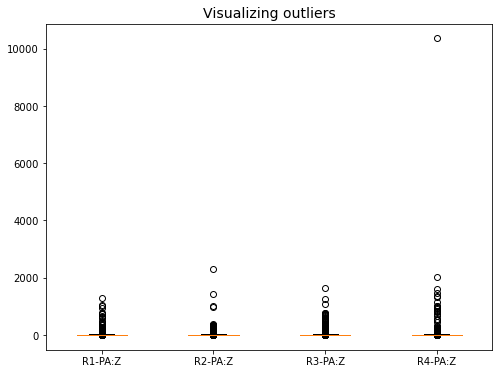

In [24]:
#plotting the outliers
features = ["R1-PA:Z", "R2-PA:Z", "R3-PA:Z", "R4-PA:Z"]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_title("Visualizing outliers", fontsize=14)
ax.boxplot(combined_df[features], vert=True)
ax.set_xticklabels(features)
plt.show()

> We can observe that there a lot of outliers and not just the infinite values. For the purpose of this project only the infinite values will be handled because this data has a lot of features and it wouldn't make sense to only handle outliers for a few columns.

#### Distributions: Visualizing some features

> Since this dataset has a lot features, only a few will be visualized to get an overview of the data.

In [25]:
#reusable function to plot a distribution
def histogram(col):
    plt.figure(figsize=(8,6))
    plt.title(f"Distribution of {col}")
    sns.histplot(data=combined_df, x=col, hue='marker')
    plt.show()

> The following plots will be the distribution of 9 random columns and for visibility the distributions are displayed for every 3 features:

In [26]:
cols = ['R1-PA1:VH', 'R1-PA2:VH', 'R1-PA3:VH', 'control_panel_log1', 'control_panel_log3', 
        'relay1_log', 'relay2_log','snort_log1', 'snort_log3']

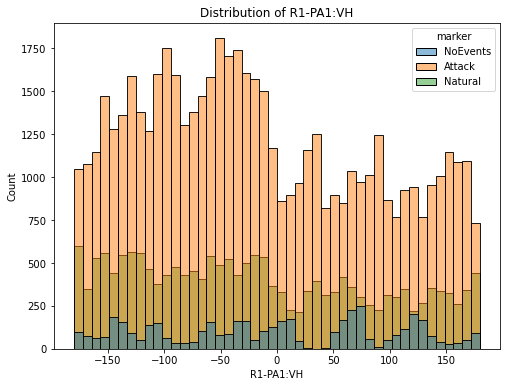

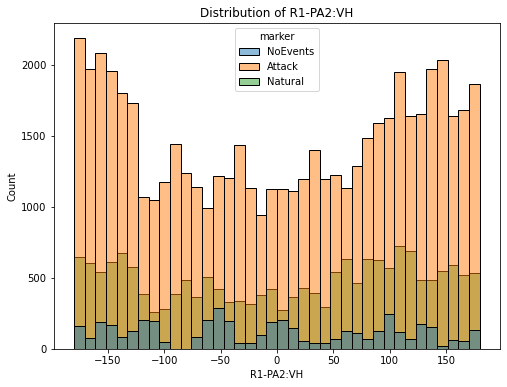

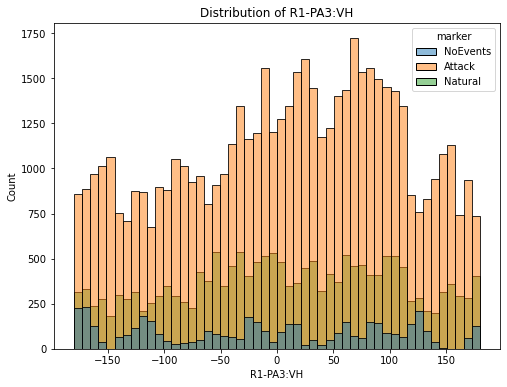

In [27]:
for col in cols[:3]:
    histogram(col)

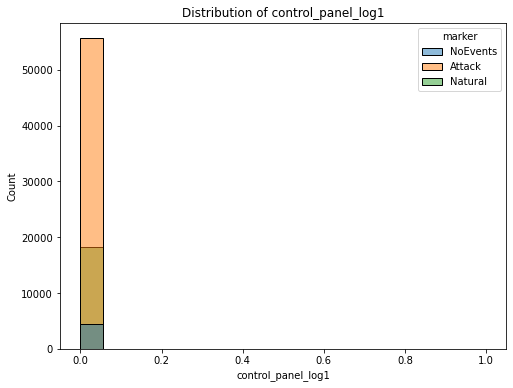

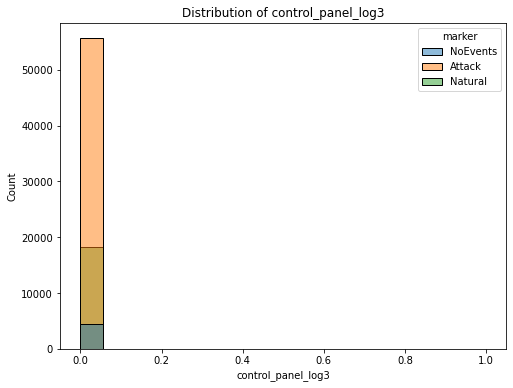

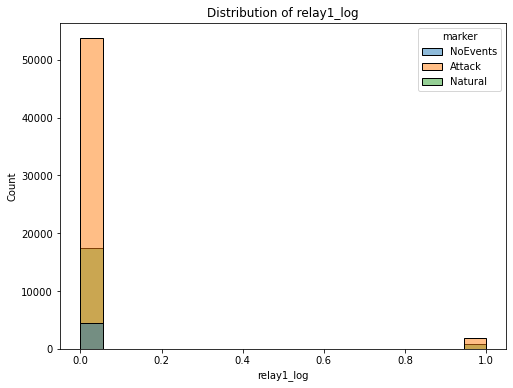

In [28]:
for col in cols[3:6]:
    histogram(col)

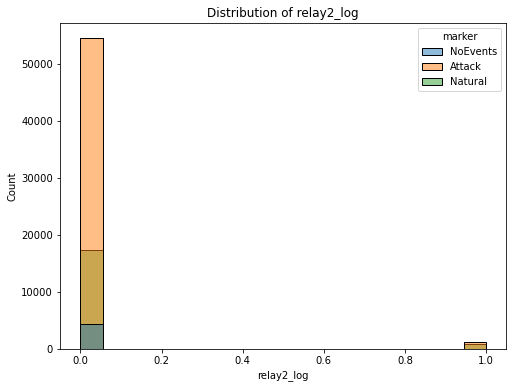

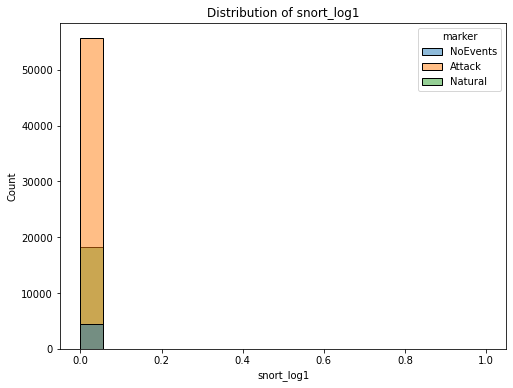

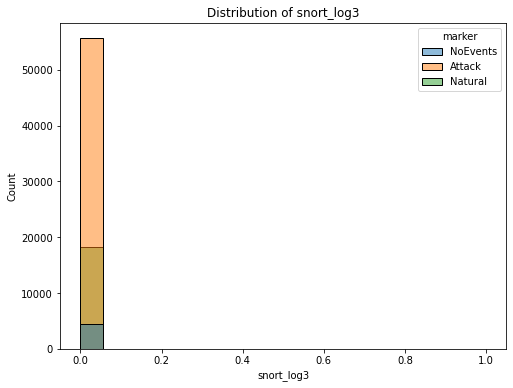

In [29]:
for col in cols[6:]:
    histogram(col)

> From the above visualizations, we can observe the class imbalance

#### Correlation matrix

In [30]:
#relationship between variables
corr_mat = combined_df.corr()
corr_mat

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
R1-PA1:VH,1.000000,-0.005874,-0.351706,-0.003943,-0.302815,-0.004928,0.908797,0.005259,-0.352569,0.005332,...,0.002438,0.002438,-0.000752,-0.000900,-0.002842,-0.002683,-0.000514,0.002703,-0.002161,-0.001057
R1-PM1:V,-0.005874,1.000000,0.006212,0.782847,-0.004730,0.791613,-0.001764,-0.609219,0.002455,-0.229795,...,-0.001701,-0.001701,0.056220,-0.001740,-0.155892,-0.147115,0.000948,0.000639,-0.005561,-0.006091
R1-PA2:VH,-0.351706,0.006212,1.000000,0.001406,-0.341597,0.002648,-0.326921,-0.003683,0.904751,0.000767,...,0.004101,0.004101,-0.007071,-0.008754,0.003171,0.007251,0.002224,0.005129,-0.004863,-0.002299
R1-PM2:V,-0.003943,0.782847,0.001406,1.000000,-0.004257,0.996400,0.001662,-0.352644,-0.005107,-0.277556,...,-0.003537,-0.003537,0.116436,0.096863,-0.255020,-0.182646,0.001084,0.000611,-0.002961,-0.003082
R1-PA3:VH,-0.302815,-0.004730,-0.341597,-0.004257,1.000000,-0.004707,-0.304352,0.013916,-0.315549,0.015507,...,-0.001766,-0.001766,0.007199,0.005706,0.000855,0.003024,0.000009,-0.003271,0.002148,0.002185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
relay4_log,-0.002683,-0.147115,0.007251,-0.182646,0.003024,-0.185449,0.002837,0.333535,0.010295,0.385638,...,0.012661,0.012661,0.156089,-0.031659,0.597247,1.000000,-0.001373,-0.001373,0.012758,0.014060
snort_log1,-0.000514,0.000948,0.002224,0.001084,0.000009,0.000766,-0.000564,-0.002166,0.002094,-0.002092,...,-0.000036,-0.000036,-0.001379,-0.001177,-0.001179,-0.001373,1.000000,0.499974,-0.000068,-0.000063
snort_log2,0.002703,0.000639,0.005129,0.000611,-0.003271,0.000272,0.002564,-0.000066,0.004979,0.000520,...,-0.000036,-0.000036,-0.001379,0.009956,-0.001179,-0.001373,0.499974,1.000000,-0.000068,-0.000063
snort_log3,-0.002161,-0.005561,-0.004863,-0.002961,0.002148,-0.002309,-0.003529,0.007663,-0.005759,0.002825,...,-0.000048,-0.000048,-0.001824,-0.001557,0.006847,0.012758,-0.000068,-0.000068,1.000000,0.771498


#### Heatmap

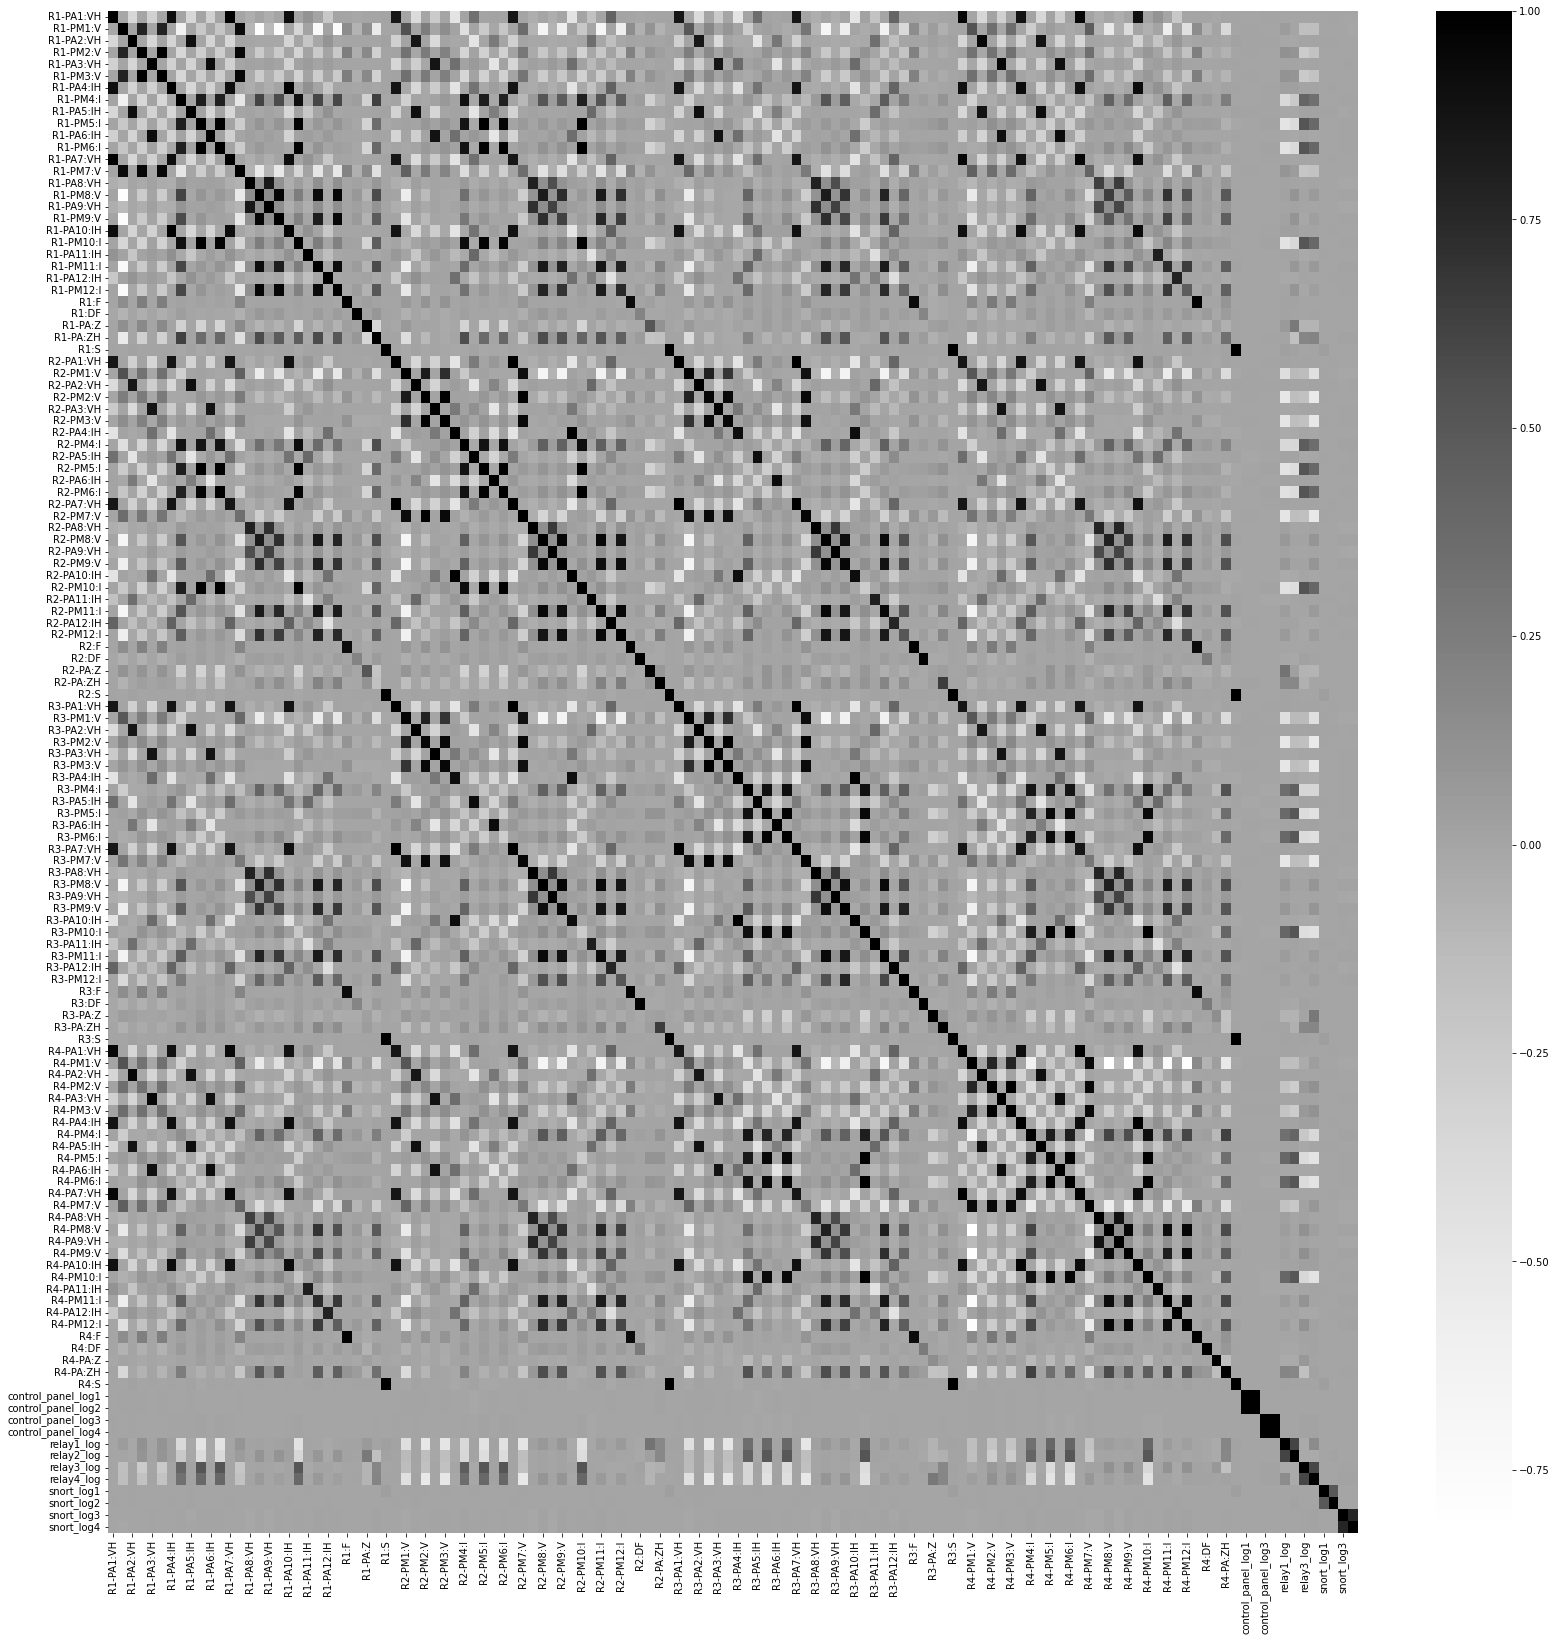

In [31]:
#heatmap for correlations above 0.5
plt.figure(figsize=(28,28))
sns.heatmap(corr_mat, cmap="Greys")
plt.show()

> From the above heatmap, we can observe that there is collinearity in the data. There exists high correlation (mulitple perfect correlations as well) between some of the features.

### 3. Preprocessing

> In this section we'll clean the data, handle outliers and scale the data. A common way to handle outliers is to remove the values, and given the size of the dataset I can afford to delete records with outliers.

In [32]:
#handling outliers
combined_df.replace([np.inf, -np.inf], np.nan, inplace=True)
combined_df.isna().values.sum()

10906

In [33]:
#dropping the nan values
combined_df.dropna(inplace=True)
combined_df.shape

(72073, 129)

In [34]:
#scaling the data
standard_scaler = StandardScaler()
scaled_data = standard_scaler.fit_transform(combined_df.iloc[:,:-1])
predictors = pd.DataFrame(scaled_data, columns=combined_df.columns[:-1])

In [35]:
predictors.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
count,7.207300e+04,7.207300e+04,7.207300e+04,7.207300e+04,7.207300e+04,7.207300e+04,7.207300e+04,7.207300e+04,7.207300e+04,7.207300e+04,...,7.207300e+04,7.207300e+04,7.207300e+04,7.207300e+04,7.207300e+04,7.207300e+04,7.207300e+04,7.207300e+04,7.207300e+04,7.207300e+04
mean,2.369158e-17,1.774167e-15,1.103865e-16,5.024808e-15,7.763690e-17,-3.373999e-15,-1.390347e-16,4.230810e-16,2.473186e-16,1.033233e-16,...,1.451055e-15,1.451055e-15,-2.832314e-15,7.163906e-16,2.543939e-15,-4.520193e-17,-1.240536e-15,-1.864934e-15,-2.374950e-15,1.049199e-15
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,...,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-1.628113e+00,-1.793149e+01,-1.629476e+00,-5.795287e+01,-1.919898e+00,-5.562969e+01,-1.630765e+00,-2.791809e+00,-1.641818e+00,-4.488889e+00,...,-3.724918e-03,-3.724918e-03,-3.248999e-02,-3.140197e-02,-3.027503e-02,-3.516228e-02,-7.449991e-03,-7.449991e-03,-9.855617e-03,-9.124465e-03
25%,-8.389852e-01,-1.873652e-03,-9.304128e-01,-2.586932e-01,-7.891378e-01,-2.315377e-01,-8.459581e-01,-5.539165e-01,-9.212620e-01,-7.830058e-01,...,-3.724918e-03,-3.724918e-03,-3.248999e-02,-3.140197e-02,-3.027503e-02,-3.516228e-02,-7.449991e-03,-7.449991e-03,-9.855617e-03,-9.124465e-03
50%,-1.319824e-01,8.481566e-02,5.375927e-02,1.996415e-02,6.916182e-02,3.524575e-02,-1.350807e-01,-8.333155e-02,6.753407e-02,-2.609565e-02,...,-3.724918e-03,-3.724918e-03,-3.248999e-02,-3.140197e-02,-3.027503e-02,-3.516228e-02,-7.449991e-03,-7.449991e-03,-9.855617e-03,-9.124465e-03
75%,8.344496e-01,1.526595e-01,9.200542e-01,2.380438e-01,8.080059e-01,2.440327e-01,8.312665e-01,4.343119e-01,9.151322e-01,7.988514e-01,...,-3.724918e-03,-3.724918e-03,-3.248999e-02,-3.140197e-02,-3.027503e-02,-3.516228e-02,-7.449991e-03,-7.449991e-03,-9.855617e-03,-9.124465e-03
max,1.937776e+00,2.304816e+00,1.590622e+00,6.974281e+00,1.784582e+00,6.867221e+00,1.925830e+00,9.911369e+00,1.580655e+00,9.301334e+00,...,2.684623e+02,2.684623e+02,3.077871e+01,3.184514e+01,3.303052e+01,2.843957e+01,1.342284e+02,1.342284e+02,1.014650e+02,1.095955e+02


In [36]:
#the dependent variable
target = combined_df['marker']

### 4. Model creation and evaluation

> In this section, three models: Random Forest, K Nearest Neighbors, Logistic Regression are built and compared using cross-validation. The default parameters  for each model will remain unchanged except for the random state in Random Forest which has been set to 42, for reproducible results across multiple calls.

> A Stratified K Fold cross-validator is used so as to preserve the percentage of samples for each class in each fold.

In [37]:
#cross validator 
kfolds = StratifiedKFold(n_splits=10)

> The combined_df is a large dataset made of 72073 rows and 129 columns and training the models on it was taking a significant amount of time. Thus, to reduce the computational time for training the models, I reduce the rows dataset and only use half of the rows.

In [38]:
#Selecting half the rows
X = predictors[:45000]
Y = target[:45000]

#### Random Forest

In [33]:
#cross validation with Random Forest
rf_scores = cross_validate(RandomForestClassifier(), X, Y, cv=kfolds, scoring=['precision_weighted','recall_weighted','f1_weighted'])

In [34]:
#performance metrics for Random Classifier
rf_precision = rf_scores["test_precision_weighted"].mean()
rf_recall = rf_scores["test_recall_weighted"].mean()
rf_f1 = rf_scores["test_f1_weighted"].mean()
print(f"The Weighted Average precision of the Random Forest Classifier: {rf_precision}")
print(f"The Weighted Average recall of the Random Forest Classifier: {rf_recall}")
print(f"The Weighted Average F1 score of the Random Forest Classifier: {rf_f1}")

The Weighted Average precision of the Random Forest Classifier: 0.6595388072896148
The Weighted Average recall of the Random Forest Classifier: 0.7056222222222222
The Weighted Average F1 score of the Random Forest Classifier: 0.6727930962464617


#### K Nearest Neighbors

In [35]:
#cross validation with K nearest neighbors classifier
knn_scores = cross_validate(KNeighborsClassifier(), X, Y, cv=kfolds, scoring=['precision_weighted','recall_weighted','f1_weighted'])

In [36]:
#performance metrics for K nearest neighbors classifier
knn_precision = knn_scores["test_precision_weighted"].mean()
knn_recall = knn_scores["test_recall_weighted"].mean()
knn_f1 = knn_scores["test_f1_weighted"].mean()
print(f"The Weighted Average precision of the K nearest neighbors Classifier: {knn_precision}")
print(f"The Weighted Average recall of the K nearest neighbors Classifier: {knn_recall}")
print(f"The Weighted Average F1 score of the K nearest neighbors Classifier: {knn_f1}")

The Weighted Average precision of the K nearest neighbors Classifier: 0.6157343536488892
The Weighted Average recall of the K nearest neighbors Classifier: 0.6211333333333333
The Weighted Average F1 score of the K nearest neighbors Classifier: 0.6176052128505699


#### Logistic regression

In [37]:
#cross validation with Logistic regression
lr_scores = cross_validate(LogisticRegression(), X, Y, cv=kfolds, scoring=['precision_weighted','recall_weighted','f1_weighted'])

C:\Users\Gaella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [38]:
#performance metrics for the Logistic regression model
lr_precision = lr_scores["test_precision_weighted"].mean()
lr_recall = lr_scores["test_recall_weighted"].mean()
lr_f1 = lr_scores["test_f1_weighted"].mean()
print(f"The Weighted Average precision of the Logistic regression model: {lr_precision}")
print(f"The Weighted Average recall of the Logistic regression model: {lr_recall}")
print(f"The Weighted Average F1 score of the Logistic regression model: {lr_f1}")

The Weighted Average precision of the Logistic regression model: 0.6189977119232675
The Weighted Average recall of the Logistic regression model: 0.7163999999999999
The Weighted Average F1 score of the Logistic regression model: 0.6253964707161562


> Performance metrics used to compare the above models are: **Weighted Average precision, Weighted Average recall, and Weighted Average F1 score** . These metrics are chosen because it is a mutliclass classification task and there is a class imbalance in the data. By using Weighted Average metrics, the metric calculated for each class is weighted by its number of samples in the data. In addition, Precision measures the proportion of predicted positive instances that are actually positive, while recall measures the proportion of actual positive instances that are correctly predicted, whereas the f1 score is the harmonic mean of precision and recall.

> To compare the above classifiers, the Weighted F1 score is used. A model with a higher F1 score is generally considered to be performing better, as it is able to both accurately predict positive instances and also identify a large proportion of all positive instances. The Random Forest Classifier has a higher F1 score (0.6733) compared to the other classifiers and is the recommended model. 
Furthermore, from the warnings given for the Logistic regression model, the model might not perform well for this data. The convergence warnings mean that the model was unable to find a satisfactory set of parameters within a certain number of iterations (in this case the default iterations are 100 I have also tried a different range of max_iterations, and other solvers). A valid reason could be that the data is highly nonlinear and the model is unable to capture the underlying patterns in the data.

### 5. Feature selection and engineering

> For feature selection and engineering reduction PCA is used on data which has been scaled. It will be used to select features and reduce the dimension of the original data. The PCA() is used and returns a set of new uncorrelated features that retain the most information (explain the most variance). It's useful in reducing the computational complexity of machine learning models and improving the speed of model training and prediction.

In [39]:
#performing PCA
pca = PCA(random_state=42)
components = pca.fit(X, Y)

> After fitting the PCA on the data (without specifying the compnonents or variance), the number of components returned corresponds to the initial number of columns. The variance explained by each prinicipal component can be examined as follows:

In [40]:
#variance expalined by each principal component
components.explained_variance_

array([3.17675388e+01, 1.55930933e+01, 1.10045639e+01, 8.93293791e+00,
       6.59234517e+00, 4.33194061e+00, 4.28326793e+00, 3.20625482e+00,
       3.20477090e+00, 3.16202566e+00, 2.43667668e+00, 2.41017357e+00,
       2.26014583e+00, 2.21836949e+00, 2.18698085e+00, 2.06686209e+00,
       2.01061932e+00, 1.96908946e+00, 1.91018543e+00, 1.84745188e+00,
       1.83708322e+00, 1.45983427e+00, 1.41517375e+00, 1.25092518e+00,
       1.15079836e+00, 9.96098344e-01, 8.94523928e-01, 8.28543692e-01,
       7.73405949e-01, 7.52333528e-01, 7.25091071e-01, 6.99841847e-01,
       6.42419264e-01, 6.00458951e-01, 5.75208262e-01, 5.26260761e-01,
       5.02995236e-01, 4.27630830e-01, 4.10378558e-01, 3.88849025e-01,
       3.75077974e-01, 3.73275113e-01, 3.63234383e-01, 2.44497044e-01,
       2.37987298e-01, 2.24687719e-01, 2.20481485e-01, 2.05975667e-01,
       1.90812737e-01, 1.84248085e-01, 1.72302542e-01, 1.61401528e-01,
       1.57441136e-01, 1.52963408e-01, 1.42773928e-01, 1.25542896e-01,
      

> The total variance explained by the new features is 100%, we can observe the percentage of variance contributed by each component.

In [41]:
#percentage variance contributed by each component
components.explained_variance_ratio_

array([2.35583602e-01, 1.15636188e-01, 8.16082990e-02, 6.62454117e-02,
       4.88879050e-02, 3.21250625e-02, 3.17641128e-02, 2.37771350e-02,
       2.37661304e-02, 2.34491378e-02, 1.80700517e-02, 1.78735084e-02,
       1.67609237e-02, 1.64511163e-02, 1.62183426e-02, 1.53275587e-02,
       1.49104702e-02, 1.46024906e-02, 1.41656666e-02, 1.37004434e-02,
       1.36235509e-02, 1.08259257e-02, 1.04947296e-02, 9.27668527e-03,
       8.53415882e-03, 7.38692529e-03, 6.63366370e-03, 6.14436354e-03,
       5.73546979e-03, 5.57919968e-03, 5.37717345e-03, 5.18992875e-03,
       4.76409095e-03, 4.45291917e-03, 4.26566361e-03, 3.90267582e-03,
       3.73014196e-03, 3.17125012e-03, 3.04330969e-03, 2.88364971e-03,
       2.78152552e-03, 2.76815576e-03, 2.69369512e-03, 1.81315571e-03,
       1.76488035e-03, 1.66625254e-03, 1.63505970e-03, 1.52748659e-03,
       1.41504043e-03, 1.36635790e-03, 1.27777143e-03, 1.19693104e-03,
       1.16756133e-03, 1.13435513e-03, 1.05879138e-03, 9.31008467e-04,
      

> Selecting features can be used by the help of a scree plot. It is a representation of the explained variance by each principal component, ordered from largest to smallest. The shape of the scree plot can help identify the number of significant principal components. For example, if the scree plot shows a steep drop after the first few principal components, it might indicate that the first few principal components capture most of the variance in the data and the remaining principal components do not add much additional information.

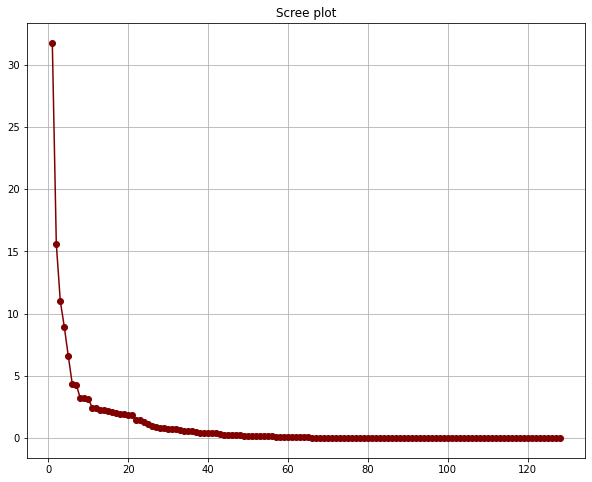

In [42]:
plt.figure(figsize=(10,8))
plt.title("Scree plot")
plt.plot(range(1,129), components.explained_variance_, "-o", color='maroon')
plt.grid()
plt.show()

In [43]:
pca.explained_variance_ratio_.cumsum()[:11]

array([0.2355836 , 0.35121979, 0.43282809, 0.4990735 , 0.54796141,
       0.58008647, 0.61185058, 0.63562772, 0.65939385, 0.68284298,
       0.70091304])

> We can observe that after the 11th component, the subsequent component don't contribute much additional information, however, the cumulative expalined variance by the 11th component is only around 70.09%. An alternative, would be specifying the variance perecntage to be explained by the new features/principal components. I aim for at least 90% of explained variance.

In [44]:
#PCA with 90% explained variance
pca = PCA(n_components=0.9).fit(X, Y)
print(f"The number of components: {pca.n_components_}")
pca.explained_variance_

The number of components: 26


array([31.76753876, 15.59309329, 11.00456392,  8.93293791,  6.59234517,
        4.33194061,  4.28326793,  3.20625482,  3.2047709 ,  3.16202566,
        2.43667668,  2.41017357,  2.26014583,  2.21836949,  2.18698085,
        2.06686209,  2.01061932,  1.96908946,  1.91018543,  1.84745188,
        1.83708322,  1.45983427,  1.41517375,  1.25092518,  1.15079836,
        0.99609834])

In [45]:
#transformed features
n = pca.n_components_
new_cols = [f"pc_{i}" for i in range(1,n+1)]
reduced = pca.transform(X)
reduced_data = pd.DataFrame(reduced, columns=new_cols)

reduced_data

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,...,pc_17,pc_18,pc_19,pc_20,pc_21,pc_22,pc_23,pc_24,pc_25,pc_26
0,6.990830,5.815642,-8.458101,-1.992616,-0.726731,1.799620,0.007179,0.820061,-0.007252,-2.902610,...,0.605194,-2.406697,2.988018,-1.039791,0.541015,1.629874,-1.430120,-0.991933,0.200544,-0.388662
1,2.587172,5.825377,-3.956004,-1.712894,-0.626711,0.530225,-0.190450,0.826073,0.009471,-3.158650,...,0.516306,-1.045221,-0.389332,-0.044321,-0.076449,1.197944,-0.154660,0.054608,-0.091457,-0.216820
2,2.575413,5.824971,-3.954361,-1.713131,-0.626877,0.509191,-0.193147,0.824606,0.009337,-3.155808,...,0.518063,-1.047609,-0.391714,-0.042345,-0.076491,1.198015,-0.149004,0.057967,-0.089487,-0.214909
3,2.353032,5.848924,-3.907694,-1.695069,-0.646029,0.218052,-0.239119,0.835365,0.008734,-3.213181,...,0.518829,-1.055841,-0.365819,-0.033982,-0.058475,1.204224,-0.119532,0.083662,-0.076534,-0.180714
4,1.975706,5.849871,-3.884284,-1.697012,-0.686484,-0.343284,-0.322733,0.833071,0.006778,-3.249523,...,0.524193,-1.055271,-0.359373,0.009206,-0.033717,1.250595,-0.062509,0.144824,-0.053140,-0.104952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-1.103750,5.533254,0.334497,-2.459871,-0.407115,0.090258,-0.049234,-0.620957,0.027768,2.406387,...,-0.349636,0.691821,0.006853,-0.037874,-0.007472,-2.311357,0.433413,0.218239,-0.077146,0.039038
44996,-1.102144,5.532466,0.332420,-2.460401,-0.407053,0.077370,-0.051484,-0.620546,0.027533,2.403453,...,-0.349606,0.693205,0.007445,-0.041168,-0.009296,-2.309445,0.434859,0.218170,-0.073976,0.037594
44997,-1.100713,5.532242,0.334302,-2.460515,-0.406617,0.075001,-0.051890,-0.620494,0.027523,2.403125,...,-0.349570,0.693430,0.007377,-0.041334,-0.009627,-2.309202,0.434534,0.220542,-0.074230,0.035499
44998,-1.099837,5.532196,0.328643,-2.461031,-0.407405,0.085320,-0.050320,-0.620321,0.027535,2.403358,...,-0.349798,0.693389,0.008331,-0.042829,-0.009574,-2.309419,0.434128,0.218855,-0.073503,0.037725


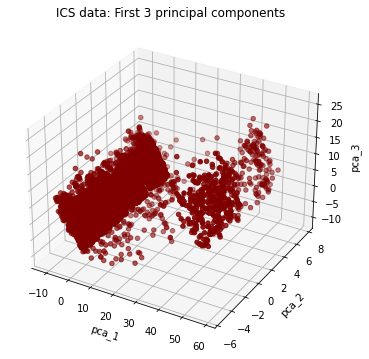

In [46]:
#viaualizing the 3 first principal components
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.set_title('ICS data: First 3 principal components')
ax.scatter3D(reduced_data["pc_1"], reduced_data["pc_2"], reduced_data["pc_3"], color='maroon')
ax.set_xlabel("pca_1")
ax.set_ylabel("pca_2")
ax.set_zlabel("pca_3")
plt.show()

In [47]:
#the reduced dataset has the same number of rows as the original data
reduced_data.shape

(45000, 26)

#### Model Building and Evaluation

> Three models: Random Forest, K Nearest Neighbors, and logistic regression will be built using the principal components selected in PCA. In this section, the deafult parameters of the model will remain unchanged as well except for the Random state parameter in the Random Forest classifier

In [48]:
x_pca = reduced_data
y_pca = Y

#### Random Forest

In [49]:
#cross validation with Random Forest
rf_scores = cross_validate(RandomForestClassifier(random_state=42), x_pca, y_pca, cv=kfolds, scoring=['precision_weighted','recall_weighted','f1_weighted'])

In [50]:
#performance metrics for Random Classifier
rf_pca_precision = rf_scores["test_precision_weighted"].mean()
rf_pca_recall = rf_scores["test_recall_weighted"].mean()
rf_pca_f1 = rf_scores["test_f1_weighted"].mean()
print(f"PCA performance:")
print(f"The Average Weighted precision of the Random Forest Classifier: {rf_pca_precision}")
print(f"The Average Weighted recall of the Random Forest Classifier: {rf_pca_recall}")
print(f"The Average Weighted F1 score of the Random Forest Classifier: {rf_pca_f1}")

PCA performance:
The Average Weighted precision of the Random Forest Classifier: 0.6319142147723421
The Average Weighted recall of the Random Forest Classifier: 0.6827333333333334
The Average Weighted F1 score of the Random Forest Classifier: 0.6476701703903677


#### K Nearest Neighbors

In [51]:
#cross validation with K nearest neighbors classifier
knn_scores = cross_validate(KNeighborsClassifier(), x_pca, y_pca, cv=kfolds, scoring=['precision_weighted','recall_weighted','f1_weighted'])

In [52]:
#performance metrics for K nearest neighbors classifier
knn_pca_precision = knn_scores["test_precision_weighted"].mean()
knn_pca_recall = knn_scores["test_recall_weighted"].mean()
knn_pca_f1 = knn_scores["test_f1_weighted"].mean()
print(f"PCA performance:")
print(f"The Weighted Average precision of the K nearest neighbors Classifier: {knn_pca_precision}")
print(f"The Weighted Average recall of the K nearest neighbors Classifier: {knn_pca_recall}")
print(f"The Weighted Average F1 score of the K nearest neighbors Classifier: {knn_pca_f1}")

PCA performance:
The Weighted Average precision of the K nearest neighbors Classifier: 0.6018032955598633
The Weighted Average recall of the K nearest neighbors Classifier: 0.6101777777777777
The Weighted Average F1 score of the K nearest neighbors Classifier: 0.6053455192181618


#### Logistic Regression

In [53]:
#cross validation with Logistic regression
lr_scores = cross_validate(LogisticRegression(), x_pca, y_pca, cv=kfolds, scoring=['precision_weighted','recall_weighted','f1_weighted'])

C:\Users\Gaella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gaella\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMI

In [54]:
#performance metrics for the Logistic regression model
lr_pca_precision = lr_scores["test_precision_weighted"].mean()
lr_pca_recall = lr_scores["test_recall_weighted"].mean()
lr_pca_f1 = lr_scores["test_f1_weighted"].mean()
print(f"PCA performance:")
print(f"The Weighted Average precision of the Logistic regression model: {lr_pca_precision}")
print(f"The Weighted Average recall of the Logistic regression model: {lr_pca_recall}")
print(f"The Weighted Average F1 score of the Logistic regression model: {lr_pca_f1}")

PCA performance:
The Weighted Average precision of the Logistic regression model: 0.5679941080321637
The Weighted Average recall of the Logistic regression model: 0.7151555555555557
The Weighted Average F1 score of the Logistic regression model: 0.5993447949508317


> Using the Weighted F1 score to compare the above classifiers, The Random Forest Classifier performs better (0.6476) than the other classifiers. Another alternative would be using Recall to compare the models. Because in ICS the cost of false negative predictions is significantly higher than the cost of false positive predictions (the classifier failing to identify potential attacks can result in the compromise of power systems), then recall may be more important than precision. If recall is considered, then Logistic regression has a higher recall (0.7151) than the other classifiers.
However, the Logistic regression model still has the convergence warnings as in the previous section, meaning that the model is unable to capture the underlying patterns in the data and might not perform well.

### 6. Hyper-parameter Tuning

> By comparing the models without feature selection and thos with feature selection, the benchmark model is the Random Forest Classifier without feature selection with an F1 score of 0.6733.

> In this section, GridsearchCv will be used to determine the best hyperparameters for the Random Forest Classifier. The hyperparameters that will be tuned are the max_depth (the maximum depth of the trees) and n_estimators (The number of trees). The resulting classifier will be compared to the benchmark model using Weighted Average F1 score.

In [55]:
#using GridSearchCV for hyperparameter tuning

# The entire search space used: estimators [30,50,65,70,75,80,90,120], max depth [10,14,15,16,20,25,27,28] 

#defining a search space 
params = {'n_estimators':[70,75,80], 'max_depth': [25,27,28]}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params, cv=kfolds, scoring='f1_weighted')

In [56]:
#fitting the grid search object to the data
grid_search = grid_search.fit(X,Y)

In [57]:
#the best parameters
grid_search.best_params_

{'max_depth': 28, 'n_estimators': 75}

In [58]:
#the Weighted Average F1 Score corresponding to best parameters
grid_search.best_score_

0.6751506566702554

> Comparing the tuned model and the benchmark model, the tuned model has a higher F1 Score thus performs better than the benchmark model. The best hyperparameters are n_estimators = 75 and max_depth = 28

#### Comparing the benchmark model and the tuned model

In [59]:
#using cross validation for the tuned model
tm_scores = cross_validate(RandomForestClassifier(n_estimators=75, max_depth=28, random_state=42), X, Y, cv=kfolds, scoring=['precision_weighted','recall_weighted','f1_weighted'])

In [60]:
#precision, recall, f1 of the model
tm_precision = tm_scores["test_precision_weighted"].mean()
tm_recall = tm_scores["test_recall_weighted"].mean()
tm_f1 = tm_scores["test_f1_weighted"].mean()

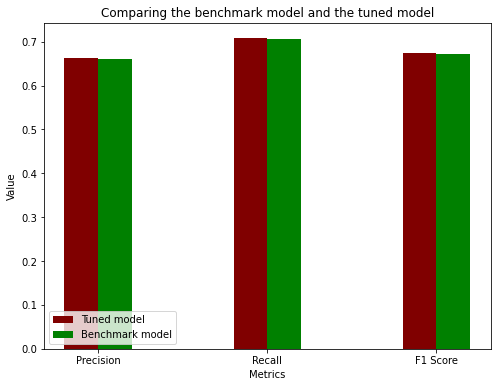

In [61]:
#plotting the performance of both models
x_axis = np.arange(3)
#plotting
plt.figure(figsize=(8,6))
plt.title("Comparing the benchmark model and the tuned model")
plt.bar(x_axis-0.1, [tm_precision, tm_recall, tm_f1], width=0.2, color="maroon", label="Tuned model")
plt.bar(x_axis+0.1, [rf_precision, rf_recall, rf_f1], width=0.2, color="green", label="Benchmark model")
plt.xticks(x_axis,["Precision", "Recall", "F1 Score"] )
plt.xlabel("Metrics")
plt.ylabel("Value")
plt.legend(loc='lower left')
plt.show()

> From the bove graph, we can observe that the tuned model has a slightly higher precision and recall compared to the benchmark model. However, the comparison of their F1 Score are not as obvious.
For reference, Benchmark model F1 Score: 0.6733174300573235 and Tuned model F1 Score: 0.6751506566702554